# Statistics for Data Science
  
<img src="../data/stats_intro.png"> </img>

Statistics can be a powerful tool when performing the art of **Data Science (DS)**. From a high-level view, statistics
is the use of mathematics to perform technical analysis of data. A basic visualization such as a bar chart might give you
some high-level information, but with statistics we get to operate on the data in a much more information-driven and
targeted way. The math involved helps us form concrete conclusions about our data rather than just guesstimating. Using
statistics, we can gain deeper and more fine grained insights into how exactly our data is structured and based on that
structure how we can optimally apply other data science techniques to get even more information.

It includes **descriptive statistics** (the study of methods and tools for collecting data, and mathematical models to describe and interpret data) and **inferential statistics** (the systems and techniques for making probability-based decisions and accurate predictions based on incomplete (sample) data).

## Linear Algebra

Linear algebra is a field of mathematics that is universally agreed to be a prerequisite to a deeper understanding of machine learning. Although linear algebra is a large field with many esoteric theories and findings, the nuts and bolts tools and notations taken from the field are practical for machine learning practitioners.

A **scalar** is a number. Examples of scalars are temperature, distance, speed or mass - all quantities that have a magnitude but no "direction", other than positive or negative.

In [1]:
# Import libraries
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

from plot_helper import *

### Vector

A vector is a list of numbers. There are (at least) two ways to interpret what this list of numbers mean: One way to think aof the vector as being a point in space. Then this list of numbers is a way of identifying that point in space, where each number represents the vector's component that dimension. Another way to think of a vector is a magnitude and direction, e.g. velocity. 

An example of a vector is $\hat{a} = \left[ 4, 3\right]$. You can visualize a vector as follows. Use the `plot_vector()` utility function to plot the a vector graphically.

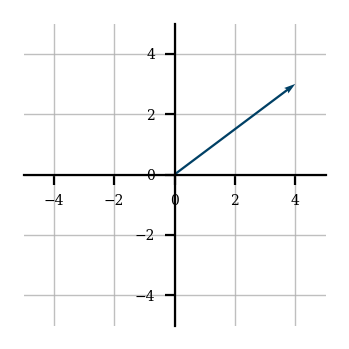

In [2]:
vectors = [(4,3)]
plot_vector(vectors)

#### Note:

The helper function `plot_vector` takes one or two lists as arguments: a list of vectors, and a list of tails (optional). It can plot one vector with its tail on several locations, or several vectors with their tail at one location. It can also plot several vectors with their tails at different locations, but in that case, the two lists have to match in length (if they don't, the function will give an error).

<div class="alert alert-block alert-success">
    
 <b> EXCERCISE 1: </b>
 
 <p> In a new code cell <span style="color:red">(Ctrl+B) </span>, create a list of vectors and plot them. The default tail position is the origin. Then create a list of tail position, and plot the same vectors again at these positions. </p>
    
</div>

### Vector addition and  substraction

Vectors can be added and subtracted. Graphically, we can show vector addition as follows.

Text(0.5, 1.0, 'Adding vectors with coordinates $(4,3)$ and $(1,2)$')

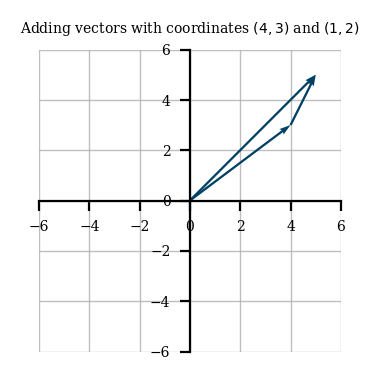

In [3]:
a = np.array([4,3])
b = np.array([1,2])
origin = np.array([0,0])

vectors = [a, b, a + b]
tails = [origin, a, origin]
plot_vector(vectors, tails)
plt.title("Adding vectors with coordinates $(4,3)$ and $(1,2)$")

### Vector multiplication

There are two principal ways of multiplying vectors, called *dot products* (or scalar products) and *cross products* (or vector products).

A dot product between two vectors $\vec{a}$ and $\vec{b}$ is computed as: 

$$c = \vec{a} \cdot \vec{b} = |\vec{a}| |\vec{b}| cos(\theta)$$, where $\theta$ is the angle between the two vectors.

A cross product between two vectors $\vec{a}$ and $\vec{b}$ is computed as: 

$$\vec{c} = \vec{a} \times \vec{b} = |\vec{a}| |\vec{b}| sin(\theta) \mathbf{n}$$

where $\mathbf{n}$ is a *unit vector* perpendicular to vectors $\vec{a}$ and $\vec{b}$.

In [4]:
a = np.array((1,2,3))
b = np.array((4,5,6))
d = np.dot(a,b)
d

32

In [5]:
c = np.cross(a,b)
c
# vectors = [a, b, c]
#plot_vector(vectors)
#plt.title("Cross product of two vectors $\vec{a}$ and $\vec{b}$")

array([-3,  6, -3])

## Matrices

Matrix, like vector, is also a collection of numbers. The difference is that a matrix is a table of numbers rather than a list.

In [8]:
A = np.array([[-2,1], [1,-3]])
A

array([[-2,  1],
       [ 1, -3]])

We can add an subtract matrices in the same way as vectors.

In [19]:
B = np.random.rand(2,2)
B

array([[0.00672992, 0.61504814],
       [0.08501384, 0.78619004]])

In [21]:
np.add(A,B)

array([[-1.99327008,  1.61504814],
       [ 1.08501384, -2.21380996]])

Python (since version 3.5) has a **built-in operator** that computes matrix multiplication `@`.

In [38]:
A@B # or simply, np.matmul(A,B)

array([[ 0.071554  , -0.44390623],
       [-0.2483116 , -1.743522  ]])

In [39]:
# Determinant
np.linalg.det(A)

5.000000000000001

In [40]:
# Determinant from stack of matrices
a = np.array([ [[1,2], [3,4]],  [[1,2],[2,1]], [[1,3],[3,1]] ])
a

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [2, 1]],

       [[1, 3],
        [3, 1]]])

In [41]:
np.linalg.det(a)

array([-2., -3., -8.])

A matrix $\mathbf{A}$ is *invertible* if there exists a matrix $\mathbf{A}^{-1}$ such that $\mathbf{A} \mathbf{A}^{-1} = \mathbf{I}$.

In [42]:
Ai = np.linalg.inv(A)
Ai

array([[-0.6, -0.2],
       [-0.2, -0.4]])

In [43]:
np.matmul(A, Ai).astype(int)

array([[1, 0],
       [0, 1]])

## Eigen vectors and Eigen values

Eigen vectors and values feature prominently in the analysis of linear transformations.

### Eigendecomposition in general

The eigenvectors of $A$ get scaled after the transformation, i.e., land on their span:

$$
\begin{align*}
  A \mathbf{v_1} = s_1 \mathbf{v_1} \\
  A \mathbf{v_2} = s_2 \mathbf{v_2}
\end{align*}
$$

The two left-hand sides are matrix-vector multiplications, each giving a vector as result. The two right-hand sides are scalings of a column vector (also resulting in vectors). We would like to combine the two equations together into a matrix equation, leading to the eigendecomposition of $A$.

Our first idea is this: matrix-matrix multiplication is the same as applying a transformation via the matrix on the left, to the columns of the matrix on the right. So if we make a matrix with the two eigenvectors as columns, and multiply it with $A$:

$$ A \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2}
    \end{bmatrix}
    = \begin{bmatrix}
    A\mathbf{v_1} & A\mathbf{v_2}
    \end{bmatrix}
$$

We can now re-write the eigenvector equations into one matrix equation by matching columns:

$$ A \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2}
    \end{bmatrix}
    = \begin{bmatrix}
    s_1\mathbf{v_1} & s_2\mathbf{v_2}
    \end{bmatrix}
$$

Using $C$ to denote the matrix of eigenvectors, the left-hand side of this matrix equation is $A\, C$.  We can express the right-hand side of the combined eigenvector equations also using $C$, by working with each column:

$$ s_1 \mathbf{v_1} = \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} \,
    \begin{bmatrix}
    s_1 \\
    0 
    \end{bmatrix} 
$$

$$ s_2 \mathbf{v_2} = \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} \,
    \begin{bmatrix}
    0 \\
    s_2 
    \end{bmatrix} 
$$

Matchng the columns, and applying our first idea for matrix-matrix multiplication: 

$$  \begin{bmatrix}
    s_1\mathbf{v_1} & s_2\mathbf{v_2}
    \end{bmatrix}
    = C\, 
    \begin{bmatrix}
    s_1 & 0 \\
    0 & s_2
    \end{bmatrix}  
$$

Using $D$ to denote the diagonal matrix of eigenvalues, this all comes together as:

$$
  A\, C = C\, D
$$

If we right-multiply by $C^{-1}$ on both sides:

$$
  A = C\, D\, C^{-1}
$$

A matrix that can be decomposed in this way is called **diagonalizable**.
Multiplying on the right by $C$ and on the left by $C^{-1}$:

$$
  C^{-1} A\, C = D
$$


If you go back to the previous lesson, you will find an expression that looks like this for applying a known transformation to a vector in a new basis. Review that section if you need to.

Applying the transformation $A$ to a vector in standard basis, $\mathbf{x}$, is:

$$
  A\, \mathbf{x} = C\, D\, C^{-1}\mathbf{x}
$$

Viewing $C$ as a change of basis, the expression on the right means we change $\mathbf{x}$ to a new basis of eigenvectors, apply a scaling by the eigenvalues in the new coordinate system, and change back to the standard basis. The effect is the same as the transformation $A$: the matrices $A$ and $D$ are called **similar**.

### Compute Eigen values

You can compute the eigenvalues and eigenvectors of a matrix using `numpy.linalg.eig()`. It returns a tuple: its first element is an array with eigen values, its second element is a 2D array, where each column is an eigenvector.

In [44]:
np.linalg.eig(A)[0]

array([-1.38196601, -3.61803399])

In [45]:
np.linalg.eig(A)[1]

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [47]:
# display each eigenvalue with corresponding eigenvector
evalues, evectors= np.linalg.eig(A)

for eva, eve in zip(evalues, evectors.T):
    print(eva, eve)

-1.381966011250105 [0.85065081 0.52573111]
-3.618033988749895 [-0.52573111  0.85065081]


Note the `.T` operation in the above for loop. This is because in the natural order, the iteration advances over the first dimension: the rows. The eigen vectors correspond to each column, to get that we need to transpose. 

To create the diagonal matrix of eigenvalues, use `numpy.diag()` function.

In [48]:
np.diag(evalues)

array([[-1.38196601,  0.        ],
       [ 0.        , -3.61803399]])

To verify the decomposition, check:

In [51]:
C = evectors
A_decomp = C @ np.diag(evalues) @ np.linalg.inv(C)
A_decomp

array([[-2.,  1.],
       [ 1., -3.]])

## Probability Distributions